In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = ["#421fb4", "#bca3ef", "#ffcf5b", "#905bff", "#ff9d00", "#170c46"]
sns.set_palette(custom_palette)
plt.rcParams['font.family'] = 'serif'

In [5]:
fc_blocksize_sweep = pd.read_csv("data/FC_blocksize_sweep.csv")

In [69]:
def create_latency_plot(files_in, x_axis, x_title, title, legends, linestyle = None):
    if linestyle is None:
        linestyle = ["-" for i in files_in]
    dfs = []
    for i, file in enumerate(files_in):
        dfs.append(pd.read_csv(file))
        sns.lineplot(x=x_axis, data=dfs[-1], y='Compute Latency', label=legends[i], linestyle = linestyle[i])

    plt.xlabel(x_title)
    plt.ylabel("Latency (Cycles)")
    plt.title(title)
    plt.show()

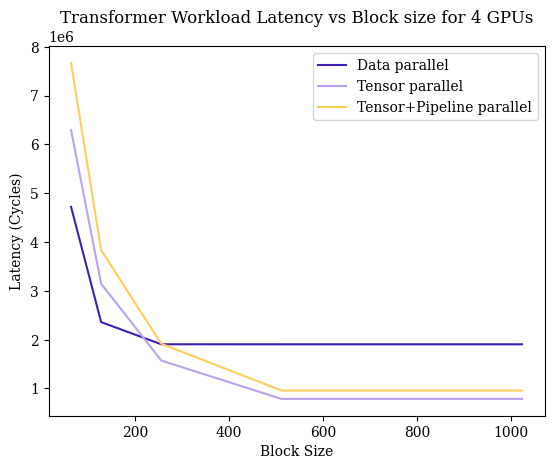

In [58]:
blocksize_files = [
    # "data/FC_blocksize_sweep.csv",
    "data/TF_blocksize_sweep.csv",
    # "data/FC TP Blocksize sweep.csv",
    "data/TF Blocksize sweep TP.csv",
    # "data/FC bsize sweep TP+PP.csv",
    "data/TF bsize sweep TP+PP.csv"
]
legends = [
    # "Data parallel, fully connected",
    "Data parallel",
    # "Tensor parallel, fully connected",
    "Tensor parallel",
    # "Tensor+Pipeline parallel, fully connected",
    "Tensor+Pipeline parallel"
] 
linestyle = [
    # "-",
    "-",
    "-",
    # "-",
    "-"
]
title = "Transformer Workload Latency vs Block size for 4 GPUs"
x_axis = "Blocksize"
x_title = "Block Size"

create_latency_plot(blocksize_files, x_axis, x_title, title, legends, linestyle)

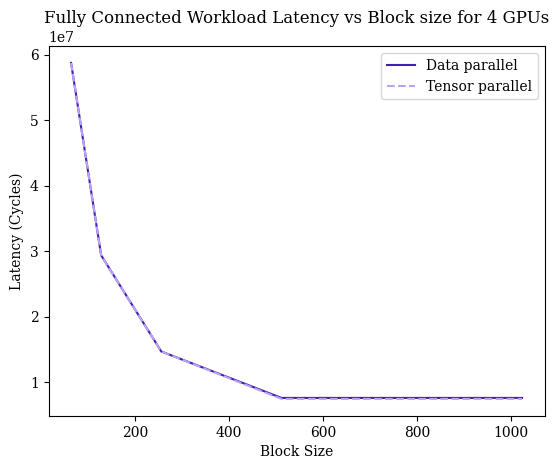

In [59]:
blocksize_files = [
    "data/FC_blocksize_sweep.csv",
    "data/FC TP Blocksize sweep.csv",
    # "data/FC bsize sweep TP+PP.csv",
]
legends = [
    "Data parallel",
    "Tensor parallel",
    # "Tensor+Pipeline parallel, fully connected",
] 
title = "Fully Connected Workload Latency vs Block size for 4 GPUs"
x_axis = "Blocksize"
x_title = "Block Size"

linestyle = [
    "-",
    "--",
]

create_latency_plot(blocksize_files, x_axis, x_title, title, legends, linestyle)

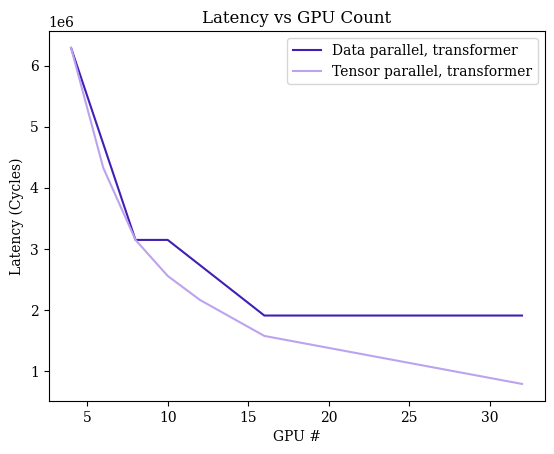

In [76]:
gpu_num_files = [
    "data/TF_GPU_num_sweep.csv",
    "data/TF GPU Sweep TP.csv"
    
]
legends = [
    "Data parallel, transformer",
    "Tensor parallel, transformer",
] 
title = "Latency vs GPU Count"
x_axis = "GPU #"
x_title = "GPU #"

linestyles = [
    "-",
    "-",
]

create_latency_plot(gpu_num_files, x_axis, x_title, title, legends, linestyles)

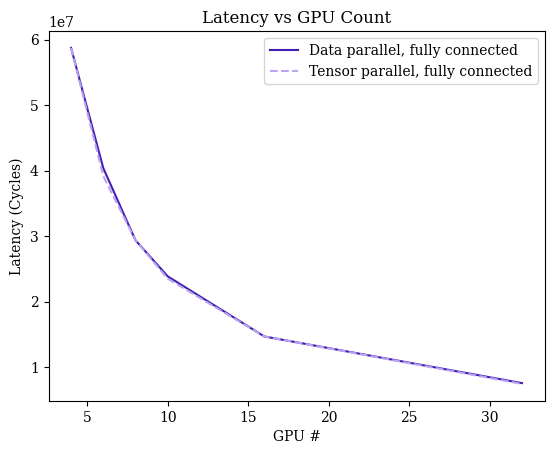

In [75]:
gpu_num_files = [
    "data/FC_GPU_num_sweep.csv",
    "data/FC GPU Sweep TP.csv",
    
]
legends = [
    "Data parallel, fully connected",
    "Tensor parallel, fully connected",
] 
title = "Latency vs GPU Count"
x_axis = "GPU #"
x_title = "GPU #"

linestyles = [
    "-",
    "--",
]

create_latency_plot(gpu_num_files, x_axis, x_title, title, legends, linestyles)

In [98]:
def create_latency_plot(file_in, x_axis, x_title, title):
    df = pd.read_csv(file_in)
    sns.lineplot(data=df, x=x_axis, y='Compute Latency')
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel("Latency (Cycles)")
    plt.show()

In [ ]:
create_latency_plot("data/FC_blocksize_sweep.csv", "Blocksize", "Block Size", "Latency vs Block size for 4 GPUs, fully connected forward workload")



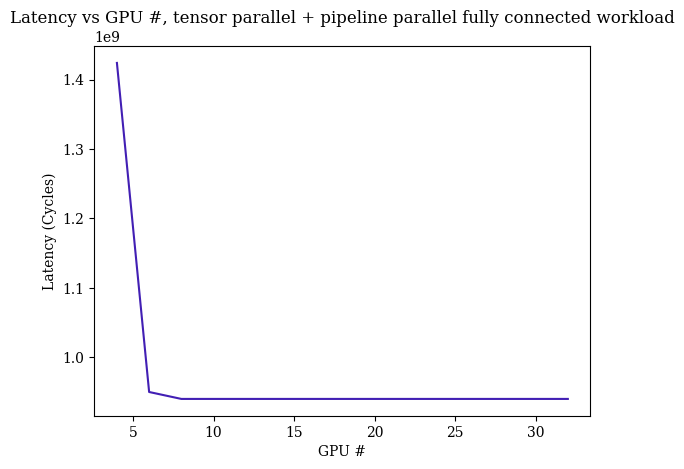

In [100]:
create_latency_plot("data/TP+PP GPU Sweep FC.csv", "GPU #", "GPU #", "Latency vs GPU #, tensor parallel + pipeline parallel fully connected workload")



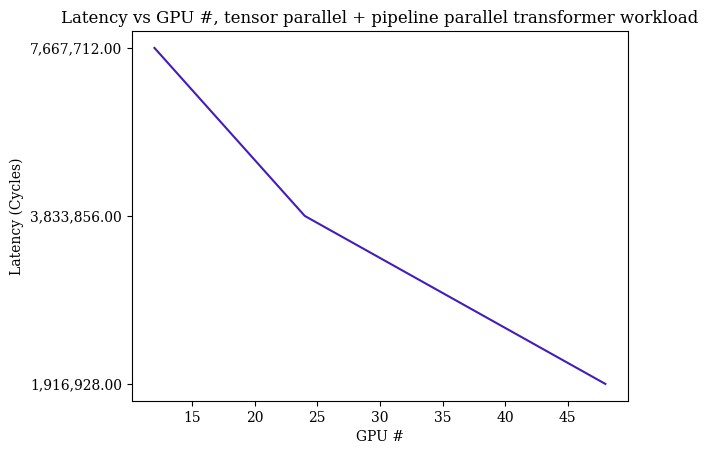

In [99]:
create_latency_plot("data/TP+PP GPU Sweep TF.csv", "GPU #", "GPU #", "Latency vs GPU #, tensor parallel + pipeline parallel transformer workload")

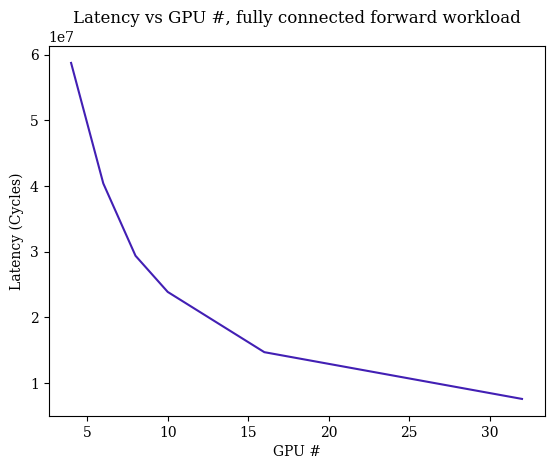

In [40]:
create_latency_plot("data/FC_GPU_num_sweep.csv", "GPU #", "GPU #", "Latency vs GPU #, fully connected forward workload")


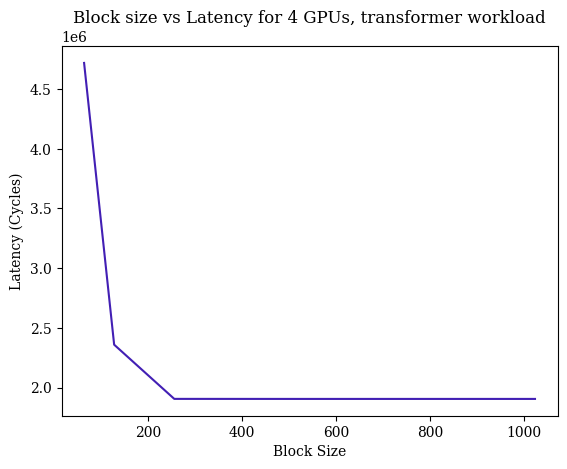

In [33]:
create_latency_plot("data/TF_blocksize_sweep.csv", "Blocksize", "Block Size", "Latency vs Block size for 4 GPUs, transformer workload")


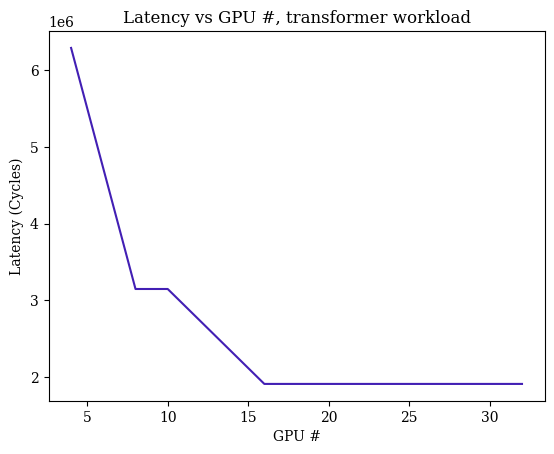

In [41]:
create_latency_plot("data/TF_GPU_num_sweep.csv", "GPU #", "GPU #", "Latency vs GPU #, transformer workload")



In [104]:
def create_energy_plot(file_in, title, index, x_title):
    df = pd.read_csv(file_in)
    df_subset = df.set_index(index)[['Global Memory Read Energy', 'Global Memory Write Energy', 'GPU Memory Read Energy', 'GPU Memory Write Energy', 'Compute Energy', 'Communication Energy (fJ)']] #, 'Communication Energy'
    df_subset.plot(kind='bar', stacked=True)
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel("Energy (fJ)")
    plt.show()

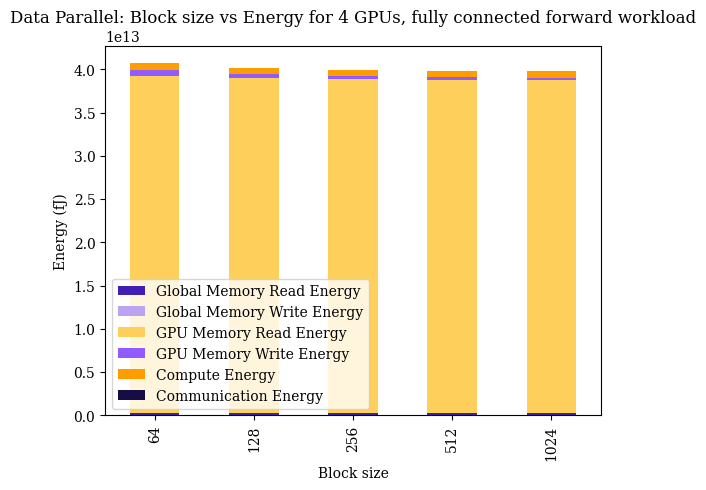

In [66]:
create_energy_plot("data/FC_blocksize_sweep.csv", "Data Parallel: Block size vs Energy for 4 GPUs, fully connected forward workload", 'Blocksize', "Block size")

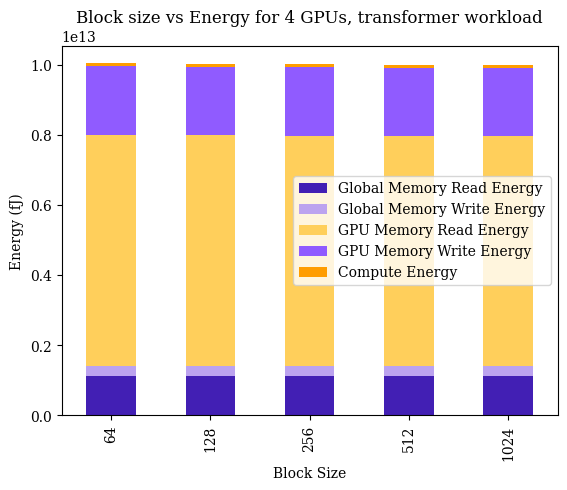

In [62]:
create_energy_plot("data/TF_blocksize_sweep.csv", "Block size vs Energy for 4 GPUs, transformer workload", 'Blocksize', 'Block Size')

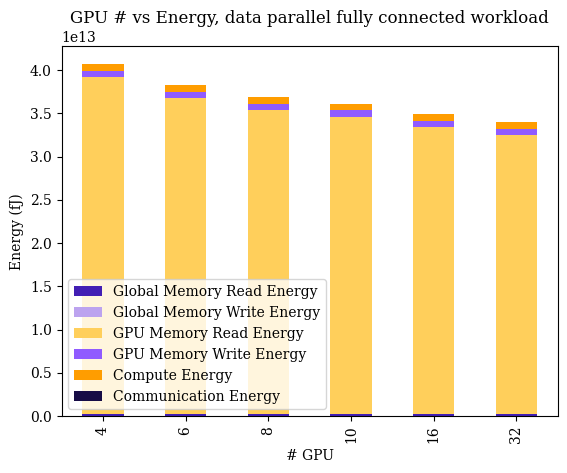

In [103]:
create_energy_plot("data/FC_GPU_num_sweep.csv", "GPU # vs Energy, data parallel fully connected workload", 'GPU #', "# GPU")


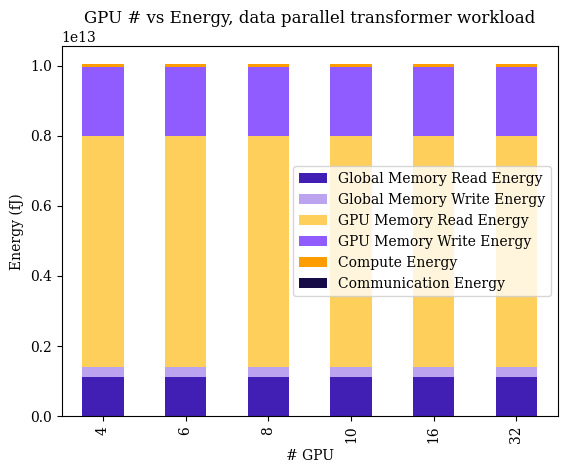

In [102]:
create_energy_plot("data/TF_GPU_num_sweep.csv", "GPU # vs Energy, data parallel transformer workload", 'GPU #', "# GPU")


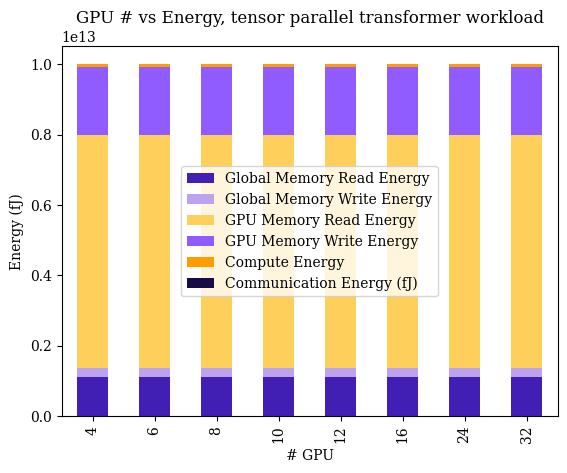

In [105]:
create_energy_plot("data/TF GPU Sweep TP.csv", "GPU # vs Energy, tensor parallel transformer workload", 'GPU #', "# GPU")


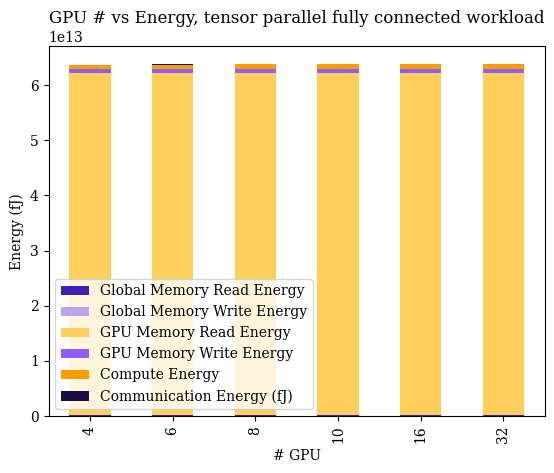

In [106]:
create_energy_plot("data/FC GPU Sweep TP.csv", "GPU # vs Energy, tensor parallel fully connected workload", 'GPU #', "# GPU")


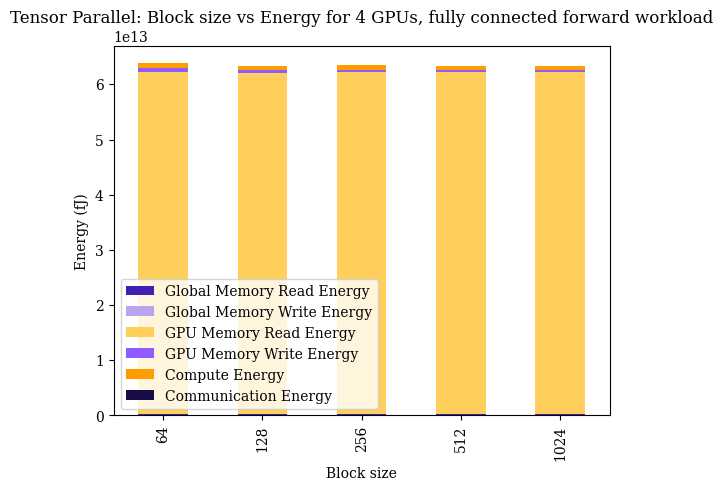

In [72]:
create_energy_plot("data/FC TP Blocksize sweep.csv", "Tensor Parallel: Block size vs Energy for 4 GPUs, fully connected forward workload", 'Blocksize', "Block size")



In [93]:
def create_communications_plot(file_in, title, index, x_title):
    df = pd.read_csv(file_in)
    df_subset = df.set_index(index)[['Forward Data Parallel Latency (ms)', 'Forward Tensor Parallel Latency (ms)', 'Forward Pipeline Parallel Latency (ms)', 'Backward Data Parallel Latency (ms)', 'Backward Tensor Parallel Latency (ms)', 'Backward Pipeline Parallel Latency (ms)']] #, 'Communication Energy'
    df_subset.plot(kind='line', stacked=False, style=["--", "-", "--", ":", ":"])
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel("Latency (ms)")
    plt.show()

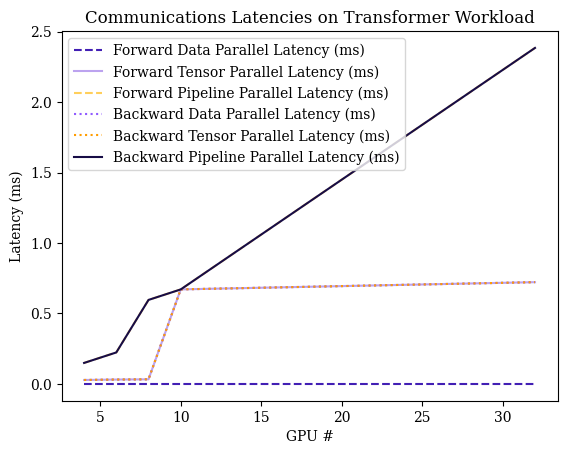

In [94]:
create_communications_plot("data/GPU Comms TF forward.csv", "Communications Latencies on Transformer Workload", 'GPU #', "GPU #")


In [95]:
def create_communications_plot(file_in, title, index, x_title):
    df = pd.read_csv(file_in)
    df_subset = df.set_index(index)[['Forward Data Parallel Energy (mJ)', 'Forward Tensor Parallel Energy (mJ)', 'Forward Pipeline Parallel Energy (mJ)', 'Backward Data Parallel Energy (mJ)', 'Backward Tensor Parallel Energy (mJ)', 'Backward Pipeline Parallel Energy (mJ)']] #, 'Communication Energy'
    df_subset.plot(kind='line', stacked=False, style=["--", "-", "--", ":", ":"])
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel("Energy (mJ)")
    plt.show()

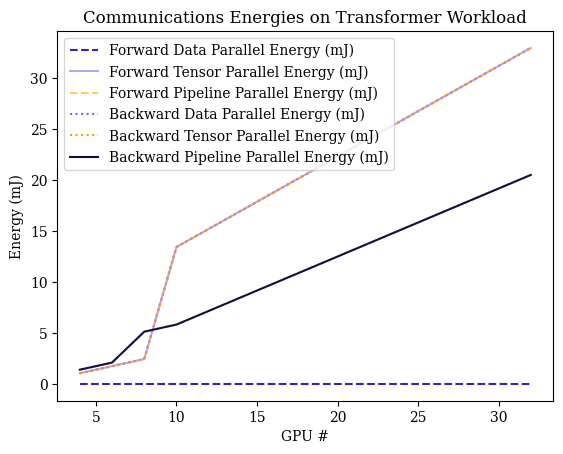

In [96]:
create_communications_plot("data/GPU Comms TF Energy.csv", "Communications Energies on Transformer Workload", 'GPU #', "GPU #")
